In [18]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import train_test_split
df = pd.read_csv("./clean_user.csv")
dist_matrix = np.genfromtxt('./100131001-100131002—T5EU.csv', delimiter=',')

In [2]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,review_count,average_stars,votes,years_yelped,num_friends
0,2,4.50,0,8,223
1,16,4.69,4,8,0
2,3,1.67,1,4,56
3,5,2.00,5,13,0
4,11,4.17,6,9,81


In [12]:
cluster_model = SpectralClustering(n_clusters=3, affinity='precomputed')
cluster_model.fit_predict(dist_matrix)
df['label'] = cluster_model.labels_

In [13]:
print(df.groupby(['label']).size())

label
0    193
1      3
2      4
dtype: int64


In [14]:
features = df.drop(columns=['label'])
label = df['label']
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.4, random_state=42)

decision_tree = tree.DecisionTreeClassifier()
train = decision_tree.fit(x_train, y_train)
score = train.score(x_test, y_test)

print(score)

0.95


[Text(0.4444444444444444, 0.9, 'X[2] <= 4.975\ngini = 0.049\nsamples = 120\nvalue = [117, 1, 2]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 96\nvalue = [96, 0, 0]'),
 Text(0.5555555555555556, 0.7, 'X[0] <= 147.5\ngini = 0.226\nsamples = 24\nvalue = [21, 1, 2]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= 56.0\ngini = 0.111\nsamples = 17\nvalue = [16, 1, 0]'),
 Text(0.2222222222222222, 0.3, 'X[0] <= 49.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1, 0]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0]'),
 Text(0.7777777777777778, 0.5, 'X[0] <= 169.0\ngini = 0.408\nsamples = 7\nvalue = [5, 0, 2]'),
 Text(0.6666666666666666, 0.3, 'X[5] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 0, 2]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.7777777777777778, 0.1, '

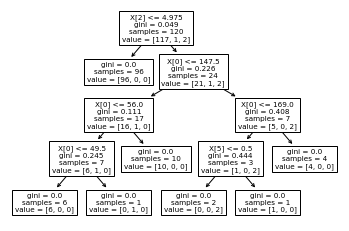

In [15]:
tree.plot_tree(train)

In [17]:
df.to_csv('./100131001-100131002—T6Data.csv', index=False)

Unused Code

In [7]:
def classify(stars):
    if stars > 4:
        return 2
    elif stars > 3: 
        return 1
    else:
        return 0